In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to load model data from a file
def load(file, skip):
    df = pd.read_csv(file, sep='\s+', skiprows=skip, header=None)
    df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df.melt(id_vars=['Year'], var_name='Month', value_name='Precipitation')
    months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                     'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    df['Month'] = df['Month'].map(months)
    
    return df

def monthly_means(df):
    period1 = df[(df['Year'] >= 1999) & (df['Year'] <= 2024)]
    period2 = df[(df['Year'] >= 2025) & (df['Year'] <= 2050)]
    
    monthly_means_1999_2024 = period1.groupby('Month')['Precipitation'].mean()
    monthly_means_2025_2050 = period2.groupby('Month')['Precipitation'].mean()
    
    return monthly_means_1999_2024, monthly_means_2025_2050


def factors(means_1999_2024, means_2025_2050):
    factors = np.where(means_1999_2024 != 0, means_2025_2050 / means_1999_2024, np.nan)
    return factors


def plot_factors(all_factors):
    plt.figure(figsize=(10, 6))
    months = np.arange(1, 13)
    for model, factors in all_factors.items():
        plt.figure()
        plt.plot(months, factors, label=model)

        plt.xlabel('Month')
        plt.ylabel('Factor (2025-2050 / 1999-2024)')
        plt.title('Monthly Factors for Climate Models')
        plt.legend(loc="upper right")
        plt.grid(True)
        plt.show()

okay 59
okay 59
okay 56
okay 61
okay 65
okay 65
okay 65
okay 65
okay 58
okay 58


<Figure size 1000x600 with 0 Axes>

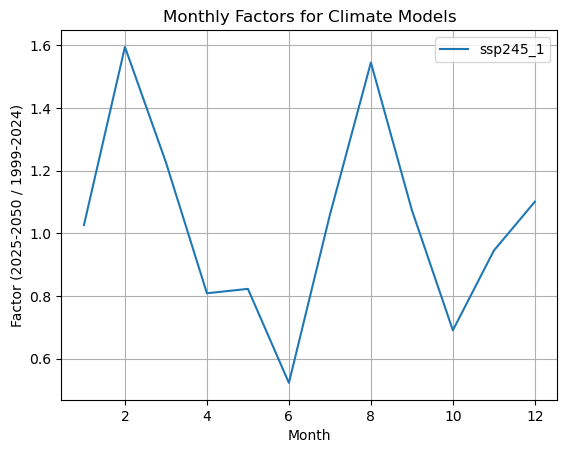

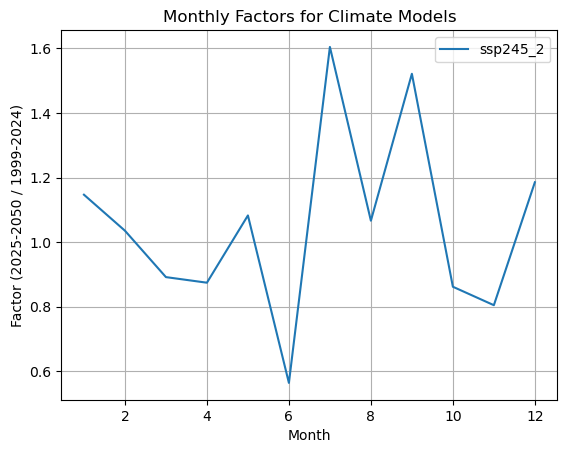

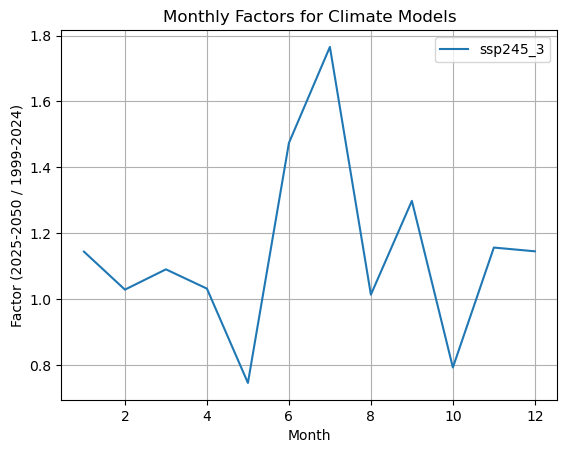

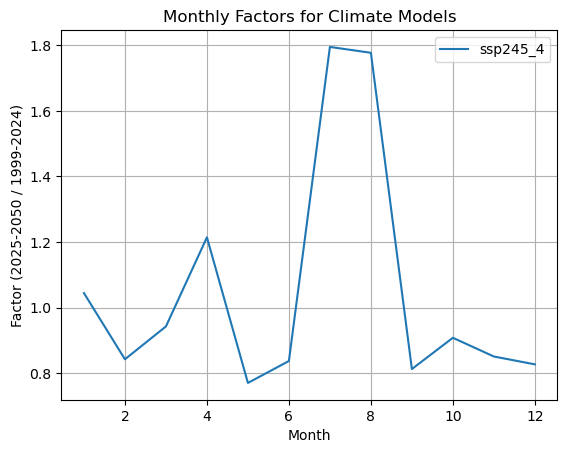

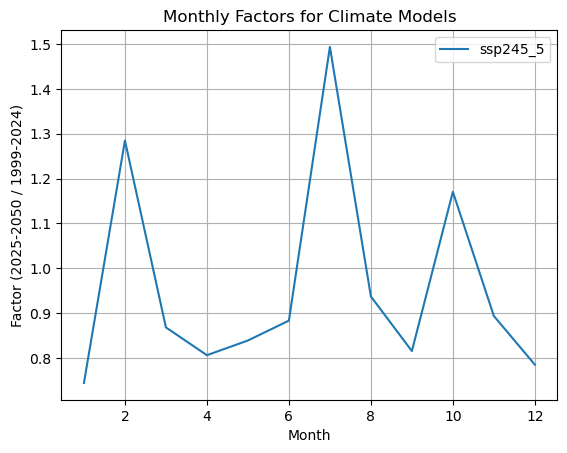

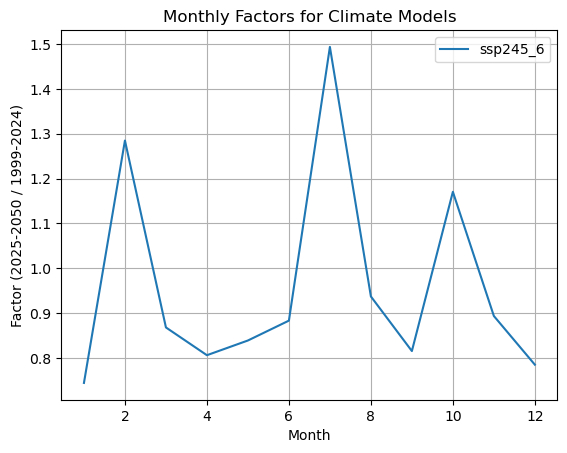

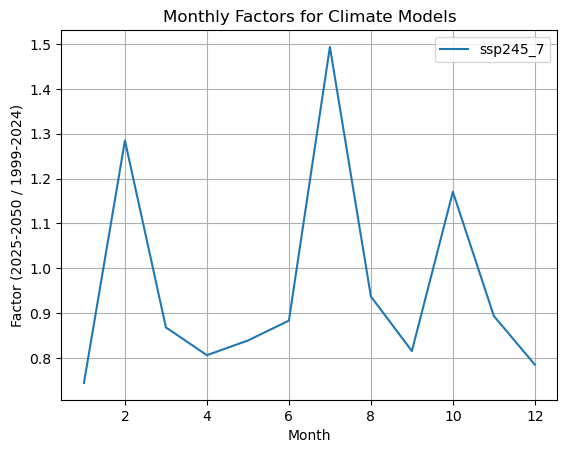

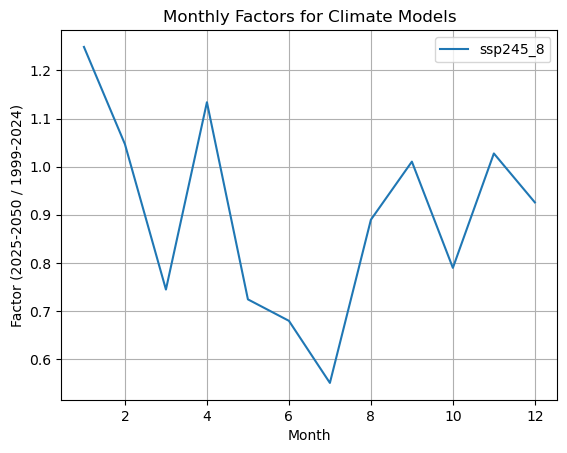

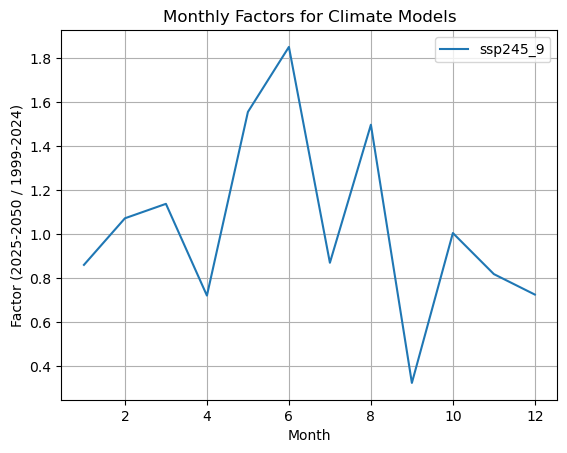

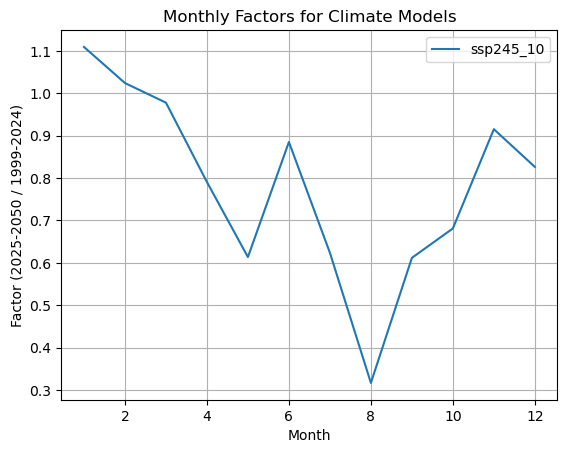

In [22]:
file_paths = [f'ssp245_{i}.txt' for i in range(1, 11)]
skip=[59, 59, 56, 61, 65, 65, 65, 65, 58, 58]

all_factors = {}
i = 1
for file_path in file_paths:
    model_name = os.path.basename(file_path).replace(".txt", "")
    print("okay", skip[i-1])
    df = load(file_path, skip[i-1])
    means_1999_2024, means_2025_2050 = monthly_means(df)
    fac = factors(means_1999_2024, means_2025_2050)
    all_factors[model_name] = fac
    i = i+1


plot_factors(all_factors)

In [ ]:
skip=[59, 59, 56, 61, 65, 65, 65, 65, 58, 58]

<function __main__.monthly_means(df)>